dùng scipy.signal tạo hàm truyền động cơ dc
\begin{equation}
    G(s) = \frac{K}{\tau s + 1}
\end{equation}

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal

#----------------------------------
# Parameters
#----------------------------------

k = 1.0
tau = 0.5

num = [k]
den = [tau, 1]
plant = signal.TransferFunction(num, den)


Bộ điều khiển PID (Proportional–Integral–Derivative) là bộ điều khiển kinh điển, được sử dụng rộng rãi trong các hệ thống điều khiển công nghiệp nhờ cấu trúc đơn giản nhưng hiệu quả cao.
Mục tiêu: điều khiển đầu ra của hệ thống bám theo giá trị đặt (setpoint) với sai số nhỏ nhất.
## Cấu trúc bộ điều khiển
Tín hiệu điều khiển đầu ra được tạo từ sai số:
\begin{equation}
e(t) = r(t)-y(t)
\end{equation}   
### Công thức PID đầy đủ

\begin{equation}
u(t) = K_p e(t) + K_i \int_0^t e(\tau)\ d(\tau)\ + K_p \frac {de(t)}{dt}
\end{equation}
Trong đó:  
$K_p$: Hệ số tỉ lệ  
$K_i$: Hệ số tích phân  
$K_d$: Hệ số đạo hàm

In [39]:
class PID:
    def __init__(self, Kp, Ki, Kd, setpoint = 1.0):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.setpoint = setpoint
        self.integral = 0.0
        self.prev_error = 0.0
    
    def _update(self, measurement, dt):
        error = self.setpoint - measurement
        self.integral += error * dt
        derivative = (error - self.prev_error)/dt
        self.prev_error = error
        output = self.Kp*error + self.Ki*self.integral + self.Kd * derivative
        return output
    
    

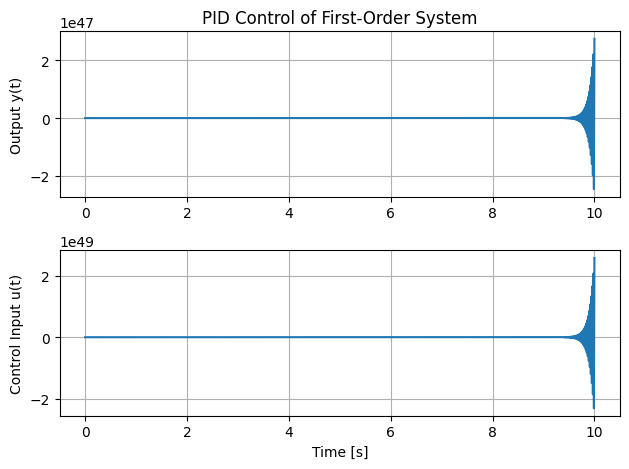

In [40]:
#----------------------------------
# Simulation
#----------------------------------
def simulate(pid, k, tau, t):
    dt = t[1] - t[0]
    n = len(t)
    y = np.zeros(n)
    u = np.zeros(n)

    for i in range(1, n):
        u[i] = pid._update(y[i-1], dt)
        dydt = (-y[i-1] + k*u[i]) / tau
        y[i] = y[i-1] + dt * dydt

    return t, y, u

# PID parameters
Kp = 10.0
Ki = 1.0
Kd = 0.5
pid = PID(Kp, Ki, Kd)
t = np.linspace(0, 10, 1000)
t, y, u = simulate(pid, k, tau, t)
plt.figure()
plt.subplot(2,1,1)
plt.plot(t, y)
plt.title('PID Control of First-Order System')
plt.ylabel('Output y(t)')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t, u)
plt.ylabel('Control Input u(t)')
plt.xlabel('Time [s]')
plt.grid()
plt.tight_layout()
plt.show()           